In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
# Càrrega de les dades netejades
df = pd.read_csv("../data/final_shelters_and_campsites.csv", index_col=0)
df.head()

,place_type,name,capacity,is_free,altitude,country,region,place,latitude,longitude,num_nearby_routes,num_services
0,0,Refugio FUENTE DEL PUERTO,NaN,0,1724.0,Spain,Aragon,Teruel,40.5081,-1.65051,4,NaN
1,1,Camping Yolimar,240.0,0,18.0,Spain,Asturias,Asturias,43.5527,-6.19617,4,NaN
2,0,Refugio HOYA DE LA MORA,NaN,0,2524.0,Spain,Andalusia,Granada,37.0941,-3.38409,8,NaN
3,0,Refugio MONSANT NATURA,32.0,0,534.0,Spain,Catalonia,Tarragona,41.2648,0.90469,25,NaN
4,1,Camping San Pedro,NaN,0,18.0,Spain,Galicia,A Coruña,43.3819,-8.28903,1,NaN


In [121]:
# Per aquest anàlisi prescindim de les columnes name i place
df.drop(['name', 'place'], axis=1, inplace=True)

In [122]:
# Recordem la quanitat de valors NA que tenim
# Aquests són valors que desconeixem dels atributs. 
# Per a alguns anàlisis concrets caldrà eliminar temporalment les files amb aquest tipus de valors. 
df.isna().sum()

place_type              0
capacity              660
is_free                 0
altitude               12
country                 0
region                  0
latitude                0
longitude               0
num_nearby_routes       0
num_services         1000
dtype: int64

Tal com podem hem vist en l'etapa de neteja, tenim dues variables principalment amb molts valors desconeguts, que són la capacitat i el nombre de serveis. 
Per altra banda, tenim 12 valors NA d'altitud que tot i la integració de dades no hem aconseguit millorar. 

In [123]:
# Anàlisi descriptiu de les variables numèriques
df.describe().T

,count,mean,std,min,25%,50%,75%,max
place_type,1472.0,0.336957,0.472831,0.0000,0.000000,0.000000,1.000000,1.00000
capacity,812.0,19.593596,30.991504,2.0000,6.000000,10.000000,20.000000,490.00000
is_free,1472.0,0.432065,0.495532,0.0000,0.000000,0.000000,1.000000,1.00000
altitude,1460.0,1146.176027,738.802993,-5.0000,544.750000,1171.500000,1724.250000,3270.00000
latitude,1472.0,41.071573,2.209489,27.9405,40.138400,42.074800,42.641825,43.56220
longitude,1472.0,-1.854596,3.263811,-17.8363,-4.166355,-1.368395,0.645108,3.79623
num_nearby_routes,1472.0,18.724864,21.654879,0.0000,4.000000,11.000000,24.000000,97.00000
num_services,472.0,2.828390,1.782850,1.0000,1.000000,2.000000,4.000000,12.00000


D'aquest anàlisi descriptiu en destaquem: 

 - La baixa quantitat de registres amb valors no NA per les variables capacity i num_services, especialment aquesta última. 
 - La mitjana de capacitat és 19'6 llits, amb una desviació estàndard força elevada, indicant força dispersió. De fet podem veure que els valors mínim i màxim estan molt allunyats. 
 - L'altitud sembla que té una distribució que podria seguir la normalitat. 

place_type
0    976
1    496
Name: place_type, dtype: int64


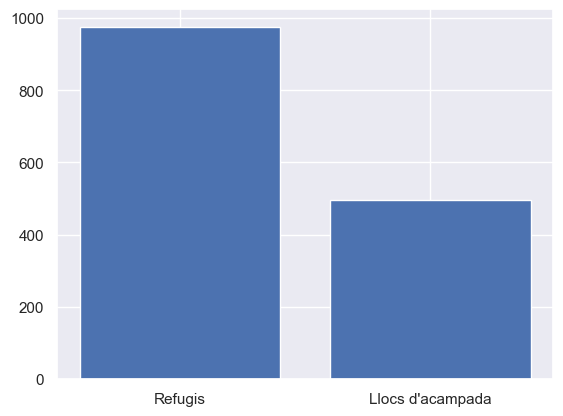

In [124]:
# Nombre de refugis i llocs d'acampada en el dataset
place_type_values = df.groupby(['place_type'])['place_type'].count()
print(place_type_values)
plt.bar(["Refugis", "Llocs d'acampada"], place_type_values)
plt.show()

is_free
0    836
1    636
Name: is_free, dtype: int64


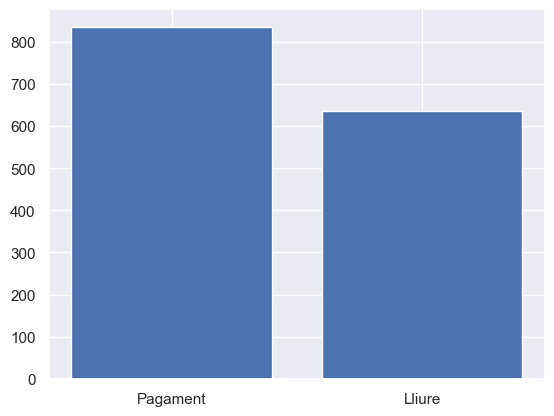

In [125]:
# Nombre d'allotjament lliures i de pagament
fee_values = df.groupby(['is_free'])['is_free'].count()
print(fee_values)
plt.bar(["Pagament", "Lliure"], fee_values)
plt.show()

Els histogrames anteriors ens permeten visualitzar que tenim més allotjaments de tipus refugi gairebé el doble que de tipus zona d'acampada. 

Per altra banda, el nombre d'allotjaments de pagament i lliures s'assemblen més, guanyant en número "de pagament".

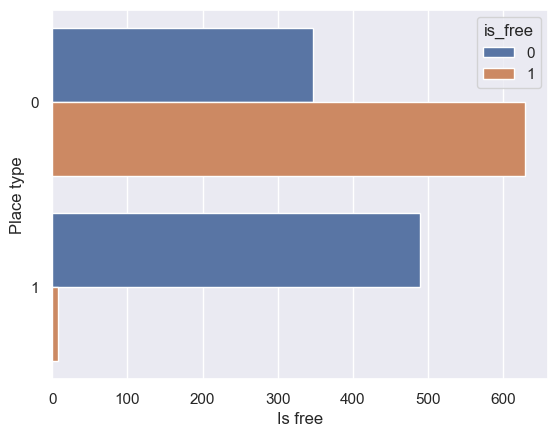

In [126]:
# A continuació visualitzaré quin tipus de producte es compra en cada branca
sns.countplot(y ='place_type', hue = "is_free", data = df) 
plt.xlabel('Is free')
plt.ylabel('Place type')
plt.show()

Si mirem la distribució comparant el tipus amb si l'allotjament és gratuït, podem veure fets contraris: 

- En refugis (tipus 0), hi ha aproximadament el doble de lliures que de pagament. 
- Mentre que en zones d'acampada (tipus 1), totes excepte un nombre molt petit són de pagament, segurament per la gran quanitat de càmpings. 

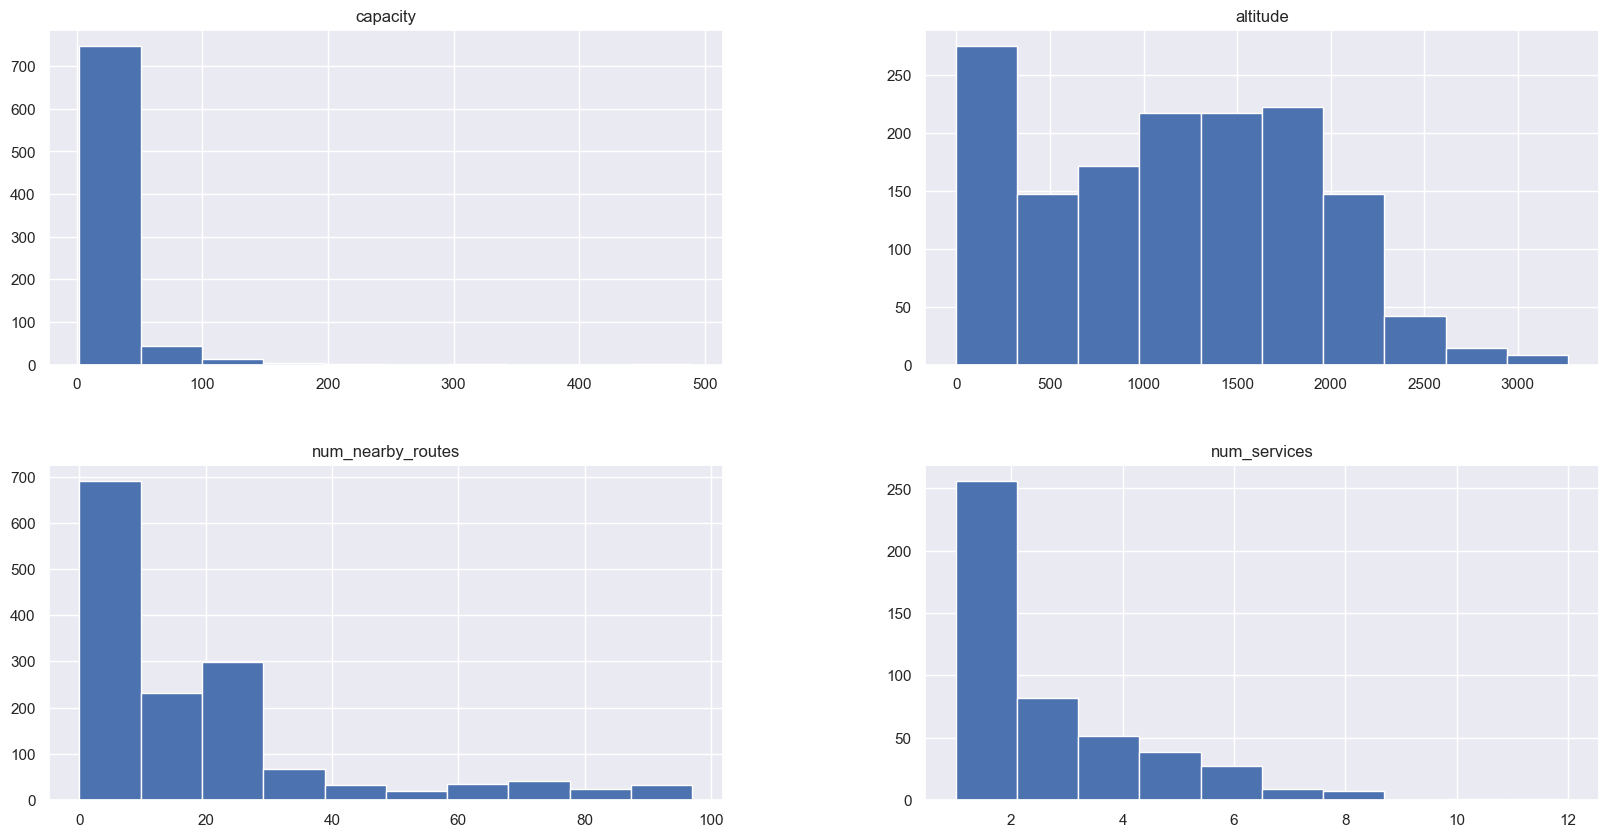

In [127]:
# Histogrames de les principals variables numèriques 
cols = ['capacity', 'altitude', 'num_nearby_routes', 'num_services']
df[cols].hist(figsize=(20,10));

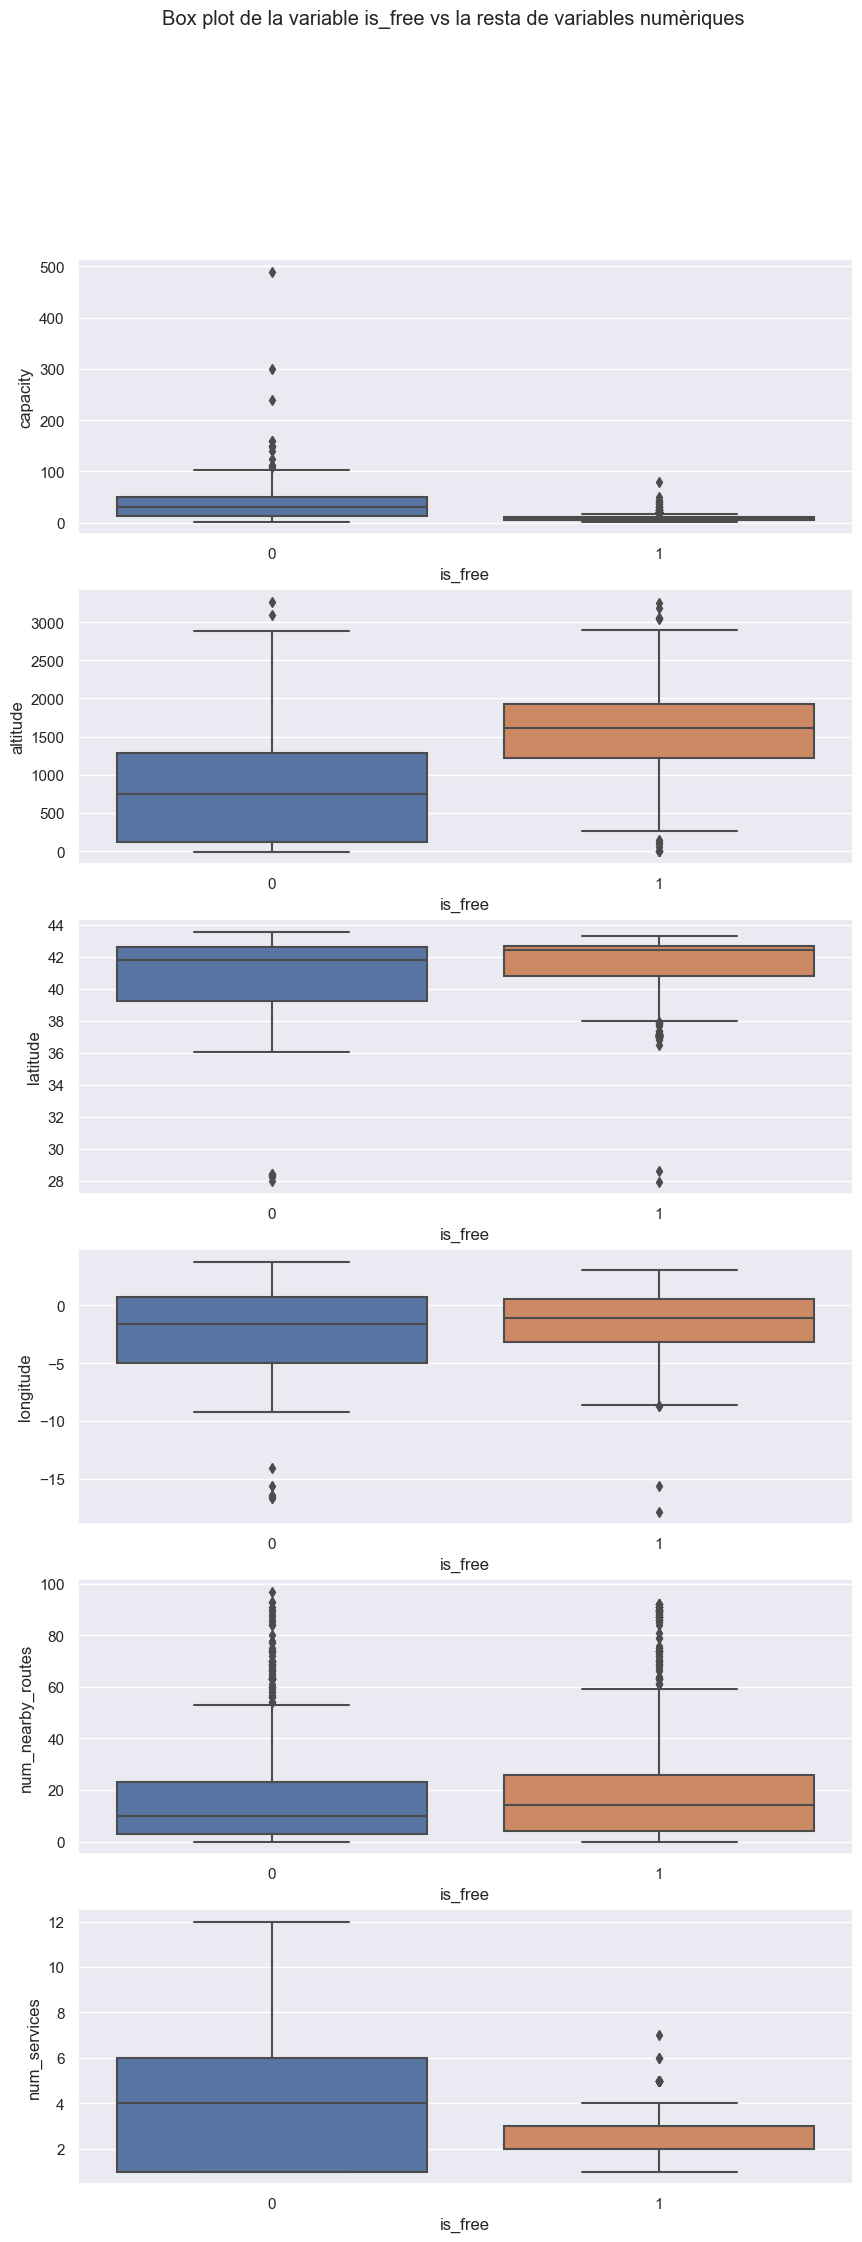

In [128]:
# Boxplot
columns = ['capacity', 'altitude', 'latitude', 'longitude', 'num_nearby_routes', 'num_services']

fig, axes = plt.subplots(6, 1, figsize= (10,25))

fig.suptitle('Box plot de la variable is_free vs la resta de variables numèriques')
for i in range(len(columns)):
    sns.boxplot(ax=axes[i-1], data=df, x='is_free', y=df[columns[i-1]])

De l'anàlisi comparatiu de les diferents variables partint pels grups "de pagament" (0) i "lliure" (1) mitjançant la visualització de boxplot, podem extreure dues informacions rellevants: 

- Hi ha una diferència remarcable per la variable altitud, on podem veure que els allotjaments de pagament es troben generalment en altituds baixes i els lliures en altituds elevades. 
- Els allotjaments lliures tenen, en general, pocs serveis (d'entre les poques dades no nul·les que tenim per aquesta variable)

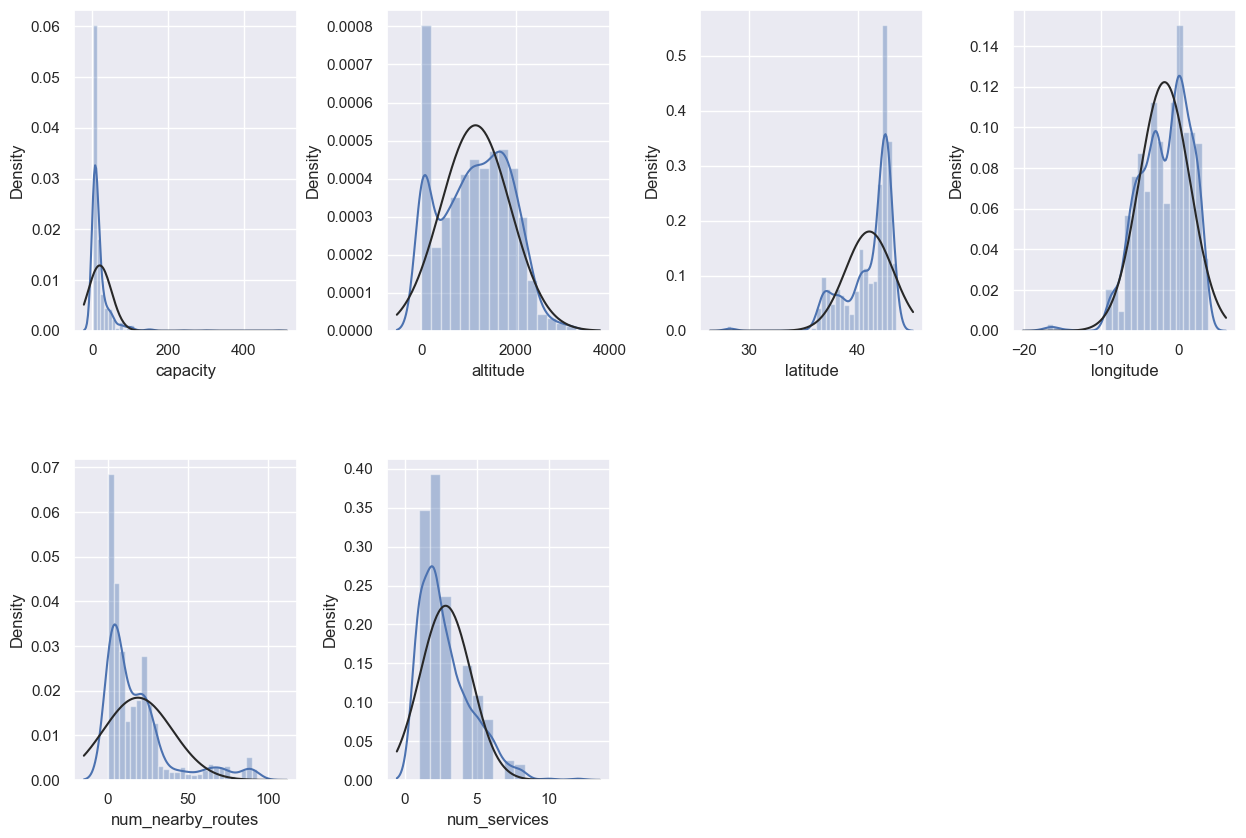

In [129]:
# Comprovació de normalitat
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(1, 7):
    ax = fig.add_subplot(2, 4, i)
    sns.distplot(df[columns[i-1]], fit = norm, ax=ax)

plt.show()

De les anteriors gràfiques, podem veure que les variables que sembla que s'apropen més a una distribució normal és prinicipalment l'altitud (a pesar del pic de registres a baixa altitud), tal com hem pogut anticipiar lleugerament abans. La longitud i el nombre de serveis també s'apropen bastant a una distribució normal. Però si haguèssim de ser estrictes, creiem que no podríem considerar cap d'aquestes variables com a normal. 

In [130]:
# Coeficient d'assimetria
for col in columns:
    print(col + ": ", df[col].skew())

capacity:  6.803246354620611
altitude:  0.02431707634410658
latitude:  -1.732205177441282
longitude:  -0.6757129660837499
num_nearby_routes:  1.8039160367073355
num_services:  1.2356627642807


In [131]:
# Transformació logarítmica per comprovar normalitat havent convertit les variables a logarítmiques

# Seleccionem únicament les variables que tenen "sentit" transformar a log
log_columns = ['capacity', 'altitude', 'num_nearby_routes', 'num_services']

df_log = pd.DataFrame()
for col in log_columns:
    df_log[col] = df.loc[df[col] > 0, col] # Cal descartar valors 0 o inferiors
    df_log[col] = np.log1p(df[col])

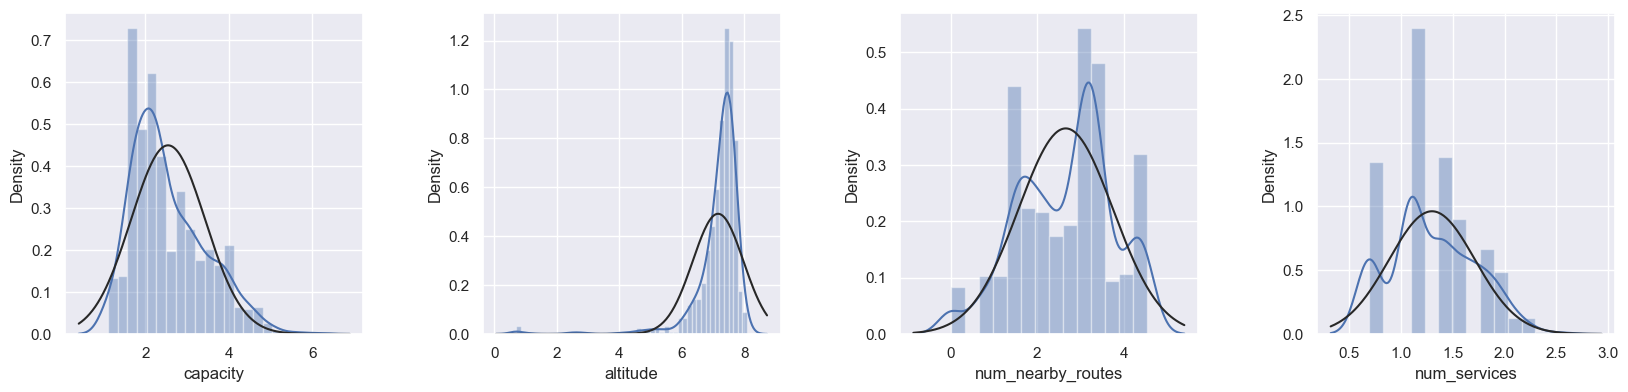

In [132]:
fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(1, 5):
    ax = fig.add_subplot(2, 4, i)
    sns.distplot(df_log[log_columns[i-1]], fit=norm, ax=ax)

Havent tranformat aquestes variables a logarítmiques, podem veure que la variable capacitat és la que més s'ajusta a la distribució normal.

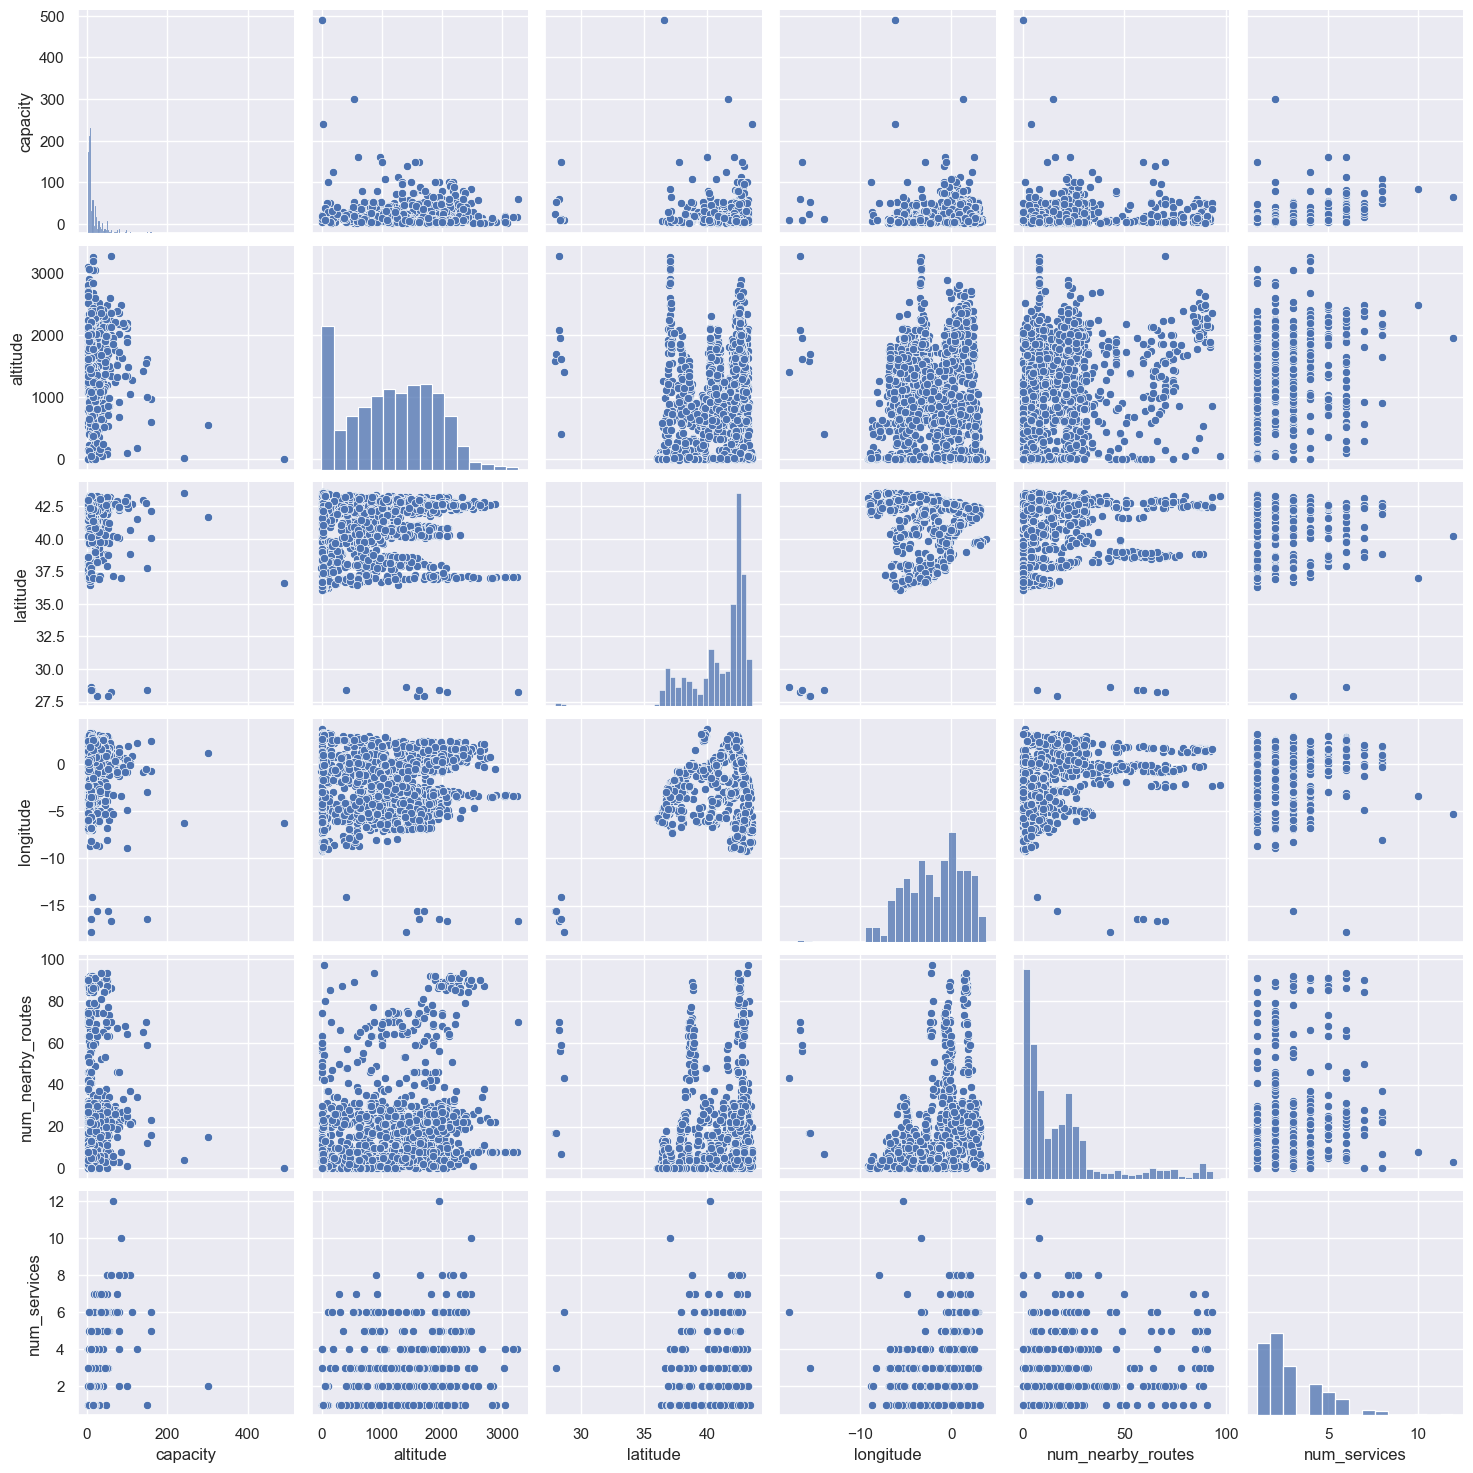

In [133]:
# Anàlisi bivariant
sns.set()
sns.pairplot(df[columns], size = 2.5)
plt.show()

<AxesSubplot: >

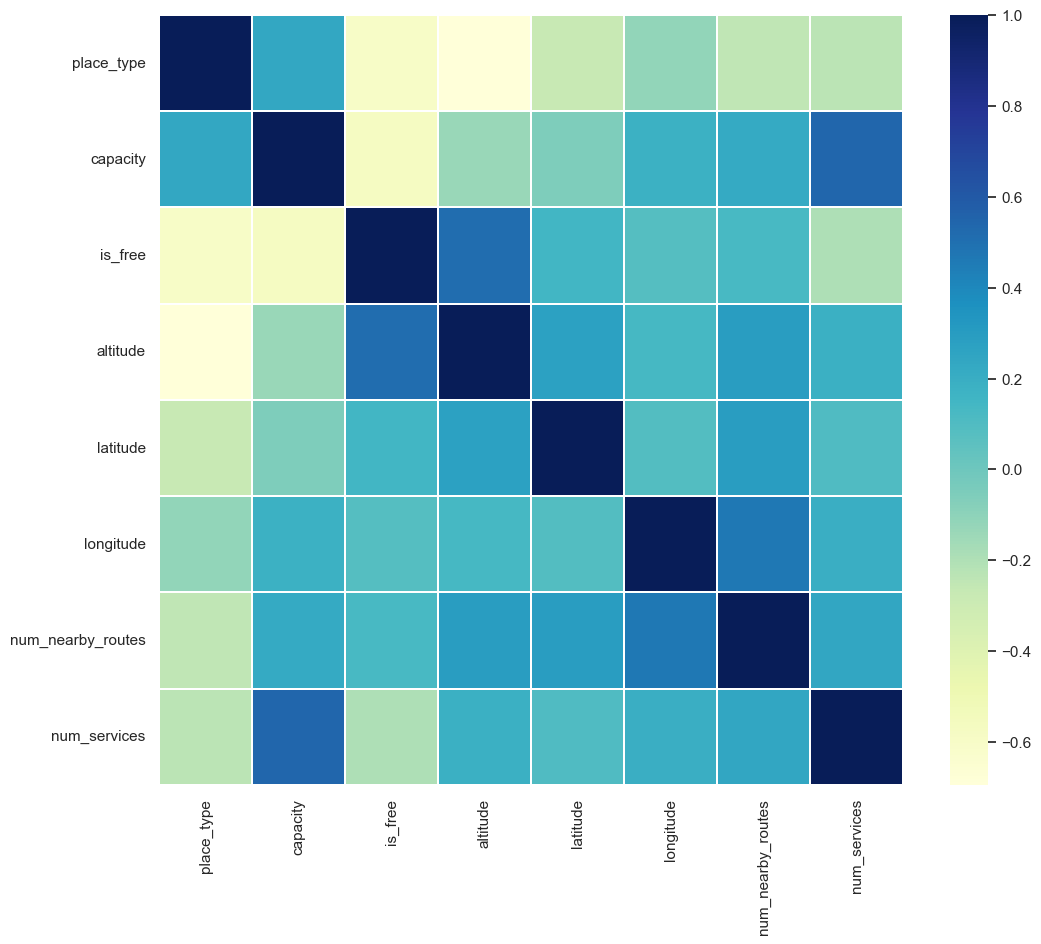

In [134]:
#Anàlisi multivariant
corrmat = df.corr(method='spearman')
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corrmat, ax=ax, cmap="YlGnBu", linewidths=0.1)

En la matriu superior podem veure les correlacions entre les variables numèriques de forma visual. 

Podem veure que la variable *is_free* té correlació elevada amb les variables *altitude* (positivament), *capacity* (negativament) i *place_type* (negativament). 

In [145]:
from sklearn.preprocessing import LabelEncoder

# Transformem els valros d'aquestes variables categoriques d'etiquetes a valors numèrics
label_encoder = LabelEncoder()
df['country_enc'] = label_encoder.fit_transform(df['country'])
df['region_enc'] = label_encoder.fit_transform(df['region'])

df[['country', 'country_enc', 'region', 'region_enc']].head()

,country,country_enc,region,region_enc
0,Spain,2,Aragon,1
1,Spain,2,Asturias,2
2,Spain,2,Andalusia,0
3,Spain,2,Catalonia,10
4,Spain,2,Galicia,15


In [149]:
#Coeficient de correlació
from scipy.stats import pearsonr

columns_pearson = 'place_type', 'capacity', 'altitude', 'country_enc', 'region_enc', 'num_nearby_routes', 'num_services'
for col in columns_pearson:
    df_tmp = df[['is_free', col]].dropna()
    corr, _ = pearsonr(df_tmp['is_free'], df_tmp[col])
    print("Correlation is_free with {0}: {1}".format(col, corr))


Correlation is_free with place_type: -0.6014766567738076
Correlation is_free with capacity: -0.4763317815691487
Correlation is_free with altitude: 0.5109127490529971
Correlation is_free with country_enc: -0.21887384662303888
Correlation is_free with region_enc: -0.07686276094814401
Correlation is_free with num_nearby_routes: 0.12321871944793428
Correlation is_free with num_services: -0.3436031955577529


Les correlacions de Pearson donen resultats equivalents amb la matriu de Spearman anterior. 

Podem veure que *is_free* i *altitude* tenen força correlació positiva (0.51), és a dir, quanta més altitud més probablement l'allotjament sigui de pagament (i a l'inversa). 

Per altra banda, *is_free* té correlació negativa amb *capacity* (-0.48) i *place_type* (-0.60), essent aquesta darrera la més alta en valor absolut. Així, podríem dir que allotjaments de pagament estan altament relacionats amb altes capacitats i allotjaments de tipus zona d'acampada. Té certa lògica. 

In [147]:
#Covariance
from numpy import cov
for col in columns:
    df_tmp = df[['is_free', col]].dropna()
    covariance = cov(df_tmp['is_free'], df_tmp[col])
    print("Covariance {0}: {1}".format(col, covariance))

Covariance capacity: [[ 2.22221547e-01 -6.95897542e+00]
 [-6.95897542e+00  9.60473350e+02]]
Covariance altitude: [[2.46023266e-01 1.87224843e+02]
 [1.87224843e+02 5.45829863e+05]]
Covariance latitude: [[0.24555168 0.16906023]
 [0.16906023 4.88183947]]
Covariance longitude: [[ 0.24555168  0.17169492]
 [ 0.17169492 10.65246284]]
Covariance num_nearby_routes: [[2.45551680e-01 1.32222054e+00]
 [1.32222054e+00 4.68933766e+02]]
Covariance num_services: [[ 0.18895516 -0.26628792]
 [-0.26628792  3.17855536]]


A continuació plantegem un model de regressió logística que predigui la variable *is_free* a partir de les variables amb les que té més correlació.

In [177]:
# Regressió logística
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Seleccionem per una regressió logística les variables dicotòmiques i numèriques que han tingut més correlació amb la variable is_free
log_columns = ['is_free', 'place_type', 'capacity', 'altitude', 'num_services']
df_log = df[log_columns].dropna()

y = df_log['is_free']
X = df_log.drop('is_free', 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=21)

print("y_train counts: ")
print(y_train.value_counts())

print("y_test counts: ")
print(y_test.value_counts())

y_train counts: 
1    240
0     49
Name: is_free, dtype: int64
y_test counts: 
1    104
0     21
Name: is_free, dtype: int64


Fixem-nos que el nombre de dades és baix i la distribució segons la variable *is_free* no és equilibrada. 
El motiu principal d'aquest desequilibri i la baixa quantitat de dades és l'eliminació de files pels valors NA.  
Seguim amb aquestes dades, a veure què tal. 

Precisió del model de regressió logística: 0.952


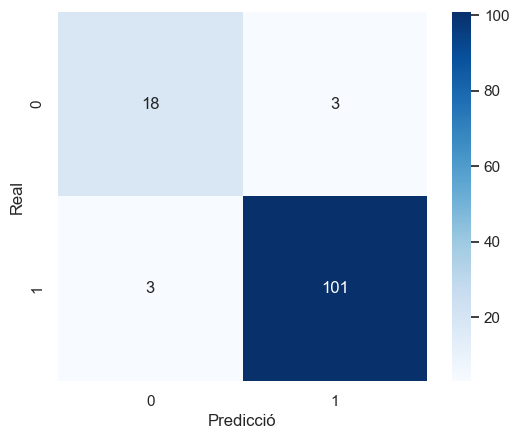

In [178]:
# Model
logreg = linear_model.LogisticRegression()
model = logreg.fit(X_train, y_train)

# Prediccions del model
predicted = model.predict(X_test)

# Precisió del model
acc = accuracy_score(y_test, predicted)
print("Precisió del model de regressió logística: " + str(acc))

# Matriu de confusió
matrix = confusion_matrix(y_test, predicted)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("Predicció")
plt.ylabel("Real")
plt.show()

In [179]:
# Conjunt de mètriques del model en test
report = classification_report(y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        21
           1       0.97      0.97      0.97       104

    accuracy                           0.95       125
   macro avg       0.91      0.91      0.91       125
weighted avg       0.95      0.95      0.95       125



Aparentment hem obtingut molt bones mètriques per aquest model de classificació, amb una precisió del 94%. Tot i això, no podem dir que sigui un bon model ja que tal com podem veure en la matriu de confusió, el model està molt esbiaixat cap a predir "de pagament".

A continuació, provem un segon model de regressió logística descartant les variables *capacity* i *num_services*, que ja hem vist a l'inici que tenen un nombre alt de valors NA. 

y_train counts: 
0    560
1    462
Name: is_free, dtype: int64
y_test counts: 
0    264
1    174
Name: is_free, dtype: int64
Precisió del model de regressió logística: 0.7557077625570776


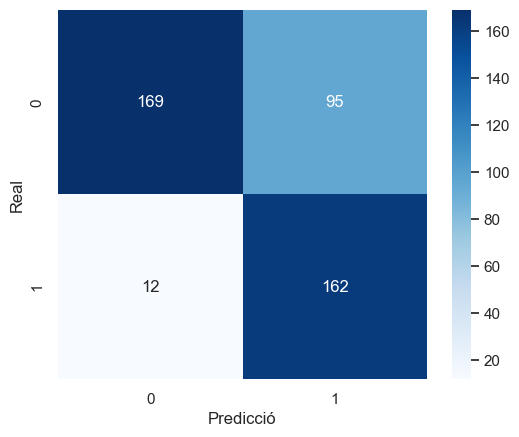

In [181]:
# Provem un segon model deixant de banda capacitat i nombre de serveis
log_columns = ['is_free', 'place_type', 'altitude']
df_log = df[log_columns].dropna()

y = df_log['is_free']
X = df_log.drop('is_free', 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=21)

print("y_train counts: ")
print(y_train.value_counts())

print("y_test counts: ")
print(y_test.value_counts())


# Model
logreg = linear_model.LogisticRegression()
model = logreg.fit(X_train, y_train)

# Prediccions del model
predicted = model.predict(X_test)

# Precisió del model
acc = accuracy_score(y_test, predicted)
print("Precisió del model de regressió logística: " + str(acc))

# Matriu de confusió
matrix = confusion_matrix(y_test, predicted)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("Predicció")
plt.ylabel("Real")
plt.show()

Per últim, aquest segon model que intenta determinar la variable *is_free* segons les variables dependents *place_type* i *altitude*, ha obtingut una precisió inferior (75.57%) al model anterior, però igualment una precisió alta. A diferència de l'altre, però, aquest model sí que no està esbiaixat cap a un valor de predicció. Segurament gràcies a no haver descartat valors vàlids d'aquestes variables per culpa de valors NA en les altres variables decartades. 

Si tenim en compte aquest comportament no esbiaixat i la bona precisió obtinguda en test, podríem afirmar que aquest sí que és un bon model que relaciona la variable *is_free* amb les dues variables *place_type* i *altitude*. 

Per tant, com a conclusió d'aquest anàlisi, les variables que més determinen si un allotjament d'aquest conjunt de dades és lliure o de pagament són: el tipus, refugi o zona d'acampada, juntament amb l'altitud. Hem vist que les variables capacitat i nombre de serveis tenen certa correlació amb la variable de gratuïtat, però degut a la poca quantitat de valors coneguts per aquestes variables, no podem considerar-les com a suficientment determinants. Per últim, les variables que no influeixen en el preu són la latitud, la longitud, el país, la regió i el nombre de rutes que hi passen. 